<a href="https://colab.research.google.com/github/xtliao/PyTorchProjects/blob/main/nn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  # iris dataset has 4 input features and 3 varieties output
  # h1 and h2 can be adjusted
  def __init__(self, input=4, h1=8, h2=8, output=3):
    super().__init__()
    self.fc1 = nn.Linear(input, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
import pandas as pd
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df.head()
# my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# convert last column variety from string to number
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)


In [5]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Get X and y from the df values
X = my_df.drop('variety',axis=1).values
y = my_df['variety'].values

In [7]:
# split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [8]:
# convert the train and test set to tensor type
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
# randomization and intialization
torch.manual_seed(37)
model = Model()

In [10]:
# set loss function and pick adam gradient descend
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # lr can be adjusted based on the loss converge result

In [11]:
# train the model
epochs = 100 # epochs can be adjusted
losses =[]
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch: {i}, loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, loss: 1.0972074270248413
Epoch: 10, loss: 0.7225729823112488
Epoch: 20, loss: 0.4551967978477478
Epoch: 30, loss: 0.2965206801891327
Epoch: 40, loss: 0.17826125025749207
Epoch: 50, loss: 0.11340675503015518
Epoch: 60, loss: 0.0846794918179512
Epoch: 70, loss: 0.07162834703922272
Epoch: 80, loss: 0.06495901197195053
Epoch: 90, loss: 0.061041366308927536


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'loss')

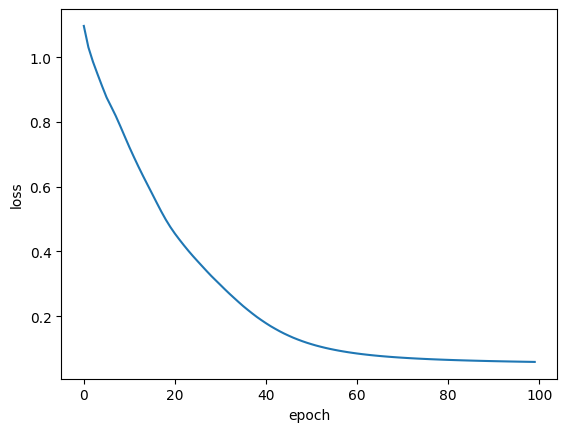

In [13]:
plt.plot(range(epochs), losses)
plt.xlabel ('epoch')
plt.ylabel('loss')

In [15]:
# evaluate the model with the test set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [16]:
loss

tensor(0.0600)